In [3]:
library(Signac)
library(Seurat)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(patchwork)
library(stringr)
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(tibble)

set.seed(17)

Attaching SeuratObject

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: ensembldb

Loading required package: GenomicRanges

Loading required package: GenomicFeatures

Loading required p

# load in data

In [28]:
files <- list.files('/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples', full.names = TRUE)

In [29]:
files

[1] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11972_QCed_030722.rds" 
 [2] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11973_QCed_030722.rds" 
 [3] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11974_QCed_030722.rds" 
 [4] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11975_QCed_030722.rds" 
 [5] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11979_QCed_030722.rds" 
 [6] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11980_QCed_030722.rds" 
 [7] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11983_QCed_030722.rds" 
 [8] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11984_QCed_030722.rds" 
 [9] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11985_QCed_030722.rds" 
[10] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-11988_QCed_030722.rds" 
[11] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D19-9146_QCed_030722.rds"  
[12] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D21-194103_QCed_030722.rds"
[13] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D21-194105_QCed_030722.rds"
[14] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D21-194106_QCed_030722.rds"
[15] "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/samples/takedaICI_snATAC_D21-194107_QCed_030722.rds"

In [30]:
sample_list <- list()
for (sample_dir in files){
    ATAC <- readRDS(sample_dir)
    sample_name <- as.character(ATAC[[]]$orig.ident)[1]
    sample_list[[sample_name]] <- ATAC
    }

 # unify peaks and merge

In [31]:
combined.peaks <- UnifyPeaks(object.list = sample_list, mode = "reduce")
combined.peaks

GRanges object with 428668 ranges and 0 metadata columns:
             seqnames        ranges strand
                <Rle>     <IRanges>  <Rle>
       [1]       chr1    9757-10715      *
       [2]       chr1 127314-128203      *
       [3]       chr1 180553-181856      *
       [4]       chr1 183779-184872      *
       [5]       chr1 186500-187447      *
       ...        ...           ...    ...
  [428664] KI270731.1   13453-14398      *
  [428665] KI270731.1   14738-15548      *
  [428666] KI270721.1     2083-2979      *
  [428667] KI270721.1     8361-9181      *
  [428668] KI270721.1    9416-10339      *
  -------
  seqinfo: 38 sequences from an unspecified genome; no seqlengths

In [ ]:
unified_obj_list <- list()
for (sample_name in names(sample_list)){
    sample_obj <- sample_list[[sample_name]]
    print(sample_obj)
    ### quantify peaks
    assign(paste0(sample_name, ".counts"), FeatureMatrix(
          fragments = Fragments(sample_obj),
          features = combined.peaks,
          sep = c(":", "-"),
          cells = colnames(sample_obj))
           )
    sample_obj[['peaks']] <- CreateAssayObject(counts = get(paste0(sample_name, ".counts")))
#     sample_obj$orig.ident <- sample_str
    unified_obj_list[[sample_name]] <- sample_obj
    }

An object of class Seurat 
127930 features across 1706 samples within 2 assays 
Active assay: peaks (108323 features, 0 variable features)
 1 other assay present: gene.activities


Extracting reads overlapping genomic regions



In [ ]:
# Create a merged Seurat object
ATAC <- merge(x = unified_obj_list[[1]], 
                       y = unified_obj_list[-1], 
                       add.cell.id = names(unified_obj_list))

# check QC

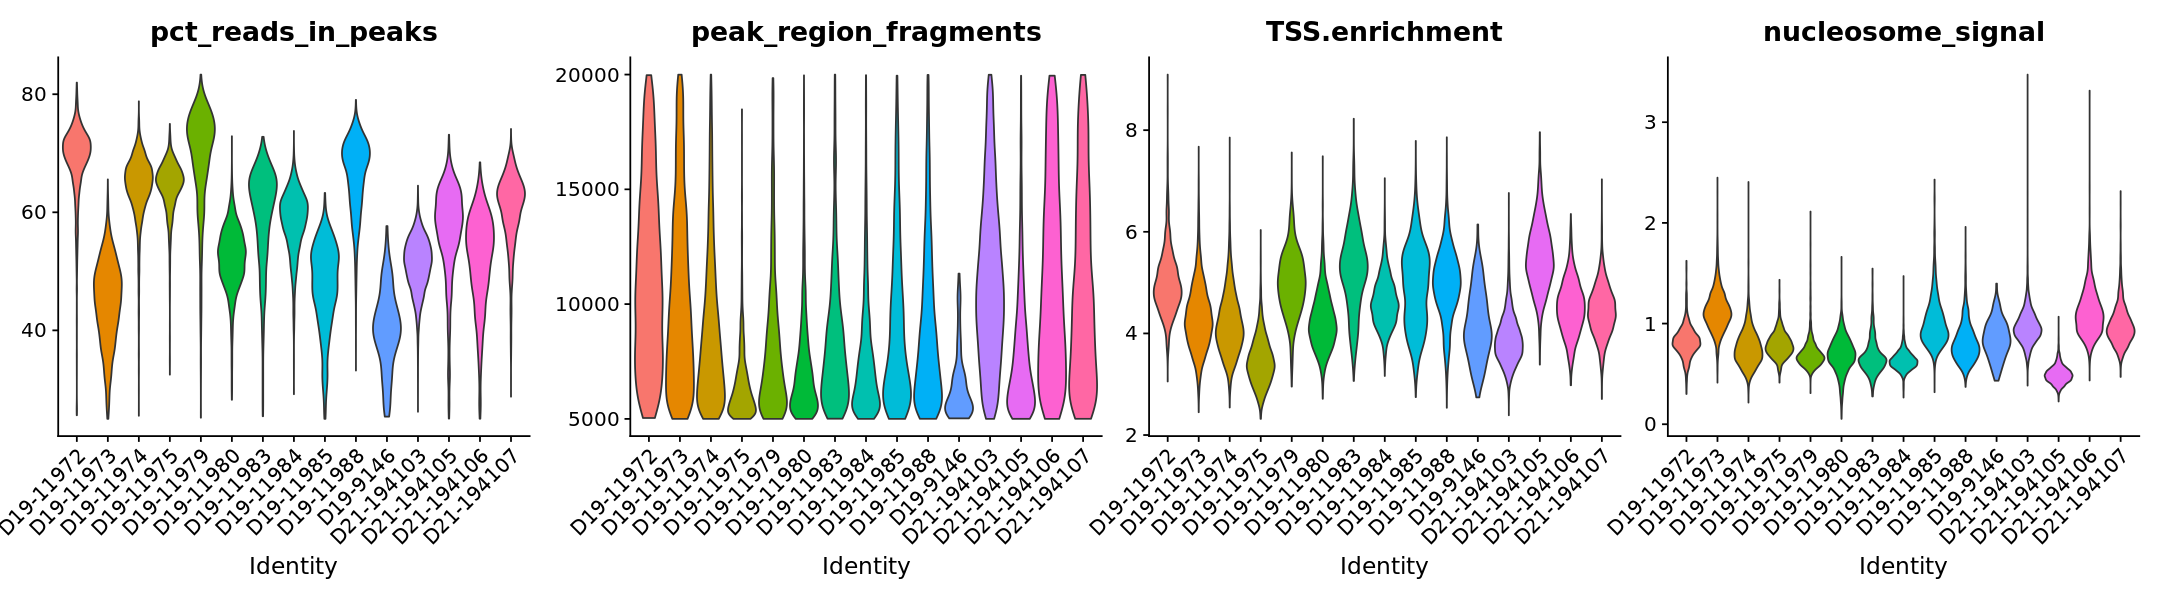

In [40]:
options(repr.plot.height = 5, repr.plot.width = 18)

VlnPlot(
  object = ATAC,
  features = c('pct_reads_in_peaks', 'peak_region_fragments',
               'TSS.enrichment',  'nucleosome_signal'),
    group.by ='orig.ident',
  pt.size = 0,
  ncol = 4
)

# normalization & dimensionality reduction

In [42]:
DefaultAssay(ATAC) <- "peaks" 

In [43]:
#frequency-inverse document frequency (TF-IDF) normalization.
#This is a two-step normalization procedure, that both normalizes across cells to correct for differences 
#in cellular sequencing depth, and across peaks to give higher values to more rare peaks
ATAC <- RunTFIDF(ATAC)
ATAC <- FindTopFeatures(ATAC, min.cutoff = 20)

Performing TF-IDF normalization



In [44]:
#singular value decomposition (SVD) on the TD-IDF matrix
ATAC <- RunSVD(ATAC)

Running SVD

Scaling cell embeddings



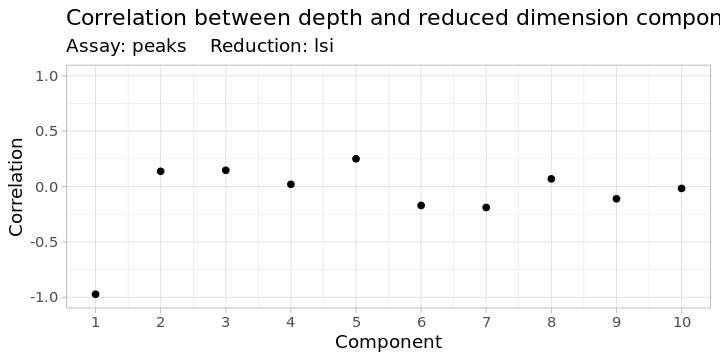

In [45]:
options(repr.plot.height = 3, repr.plot.width = 6)
#The first LSI component often captures sequencing depth (technical variation) rather than biological variation.
#If this is the case, the component should be removed from downstream analysis.
DepthCor(ATAC)

# Harmony & UMAP

In [46]:
library(harmony)

ATAC <- RunHarmony(
  object = ATAC,
  group.by.vars = 'orig.ident',
  reduction = 'lsi',
  assay.use = 'peaks',
  project.dim = FALSE
)


Loading required package: Rcpp

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



In [47]:
# re-compute the UMAP using corrected LSI embeddings
ATAC <- RunUMAP(ATAC, dims = 2:40, reduction = 'harmony')

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
10:37:25 UMAP embedding parameters a = 0.9922 b = 1.112

10:37:25 Read 45478 rows and found 39 numeric columns

10:37:25 Using Annoy for neighbor search, n_neighbors = 30

10:37:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:37:29 Writing NN index file to temp file /tmp/RtmpBmwHph/filec7697b262265

10:37:30 Searching Annoy index using 1 thread, search_k = 3000

10:37:45 Annoy recall = 100%

10:37:46 Commencing smooth kNN distance calibration using 1 thread

10:37:51 Initializing fr

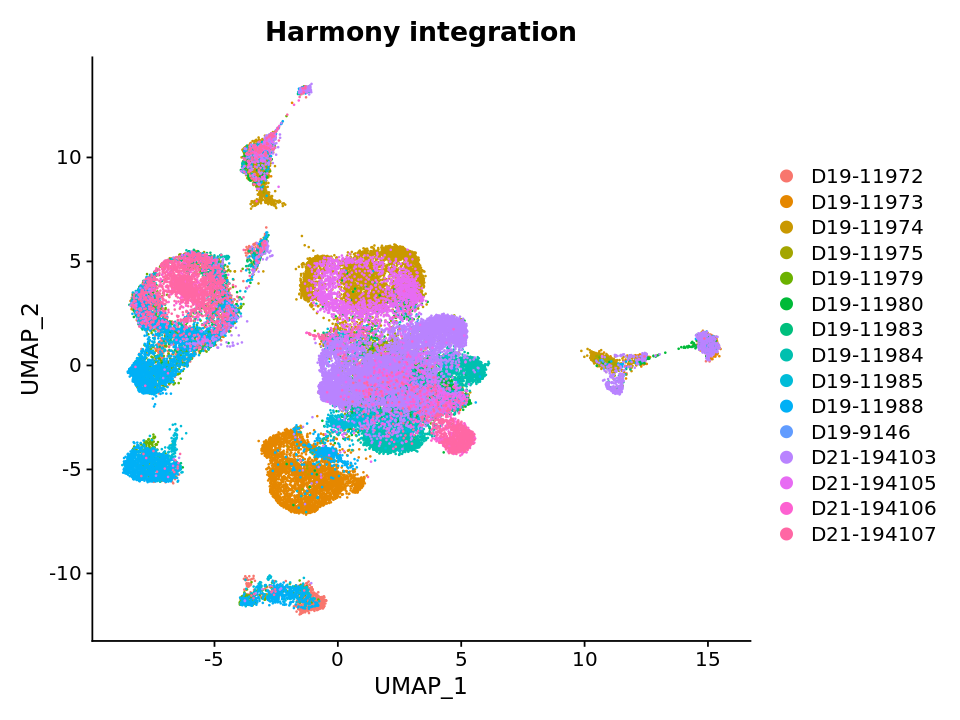

In [49]:
options(repr.plot.height = 6, repr.plot.width = 8)

DimPlot(ATAC, group.by = 'orig.ident', pt.size = 0.1) + ggplot2::ggtitle("Harmony integration")


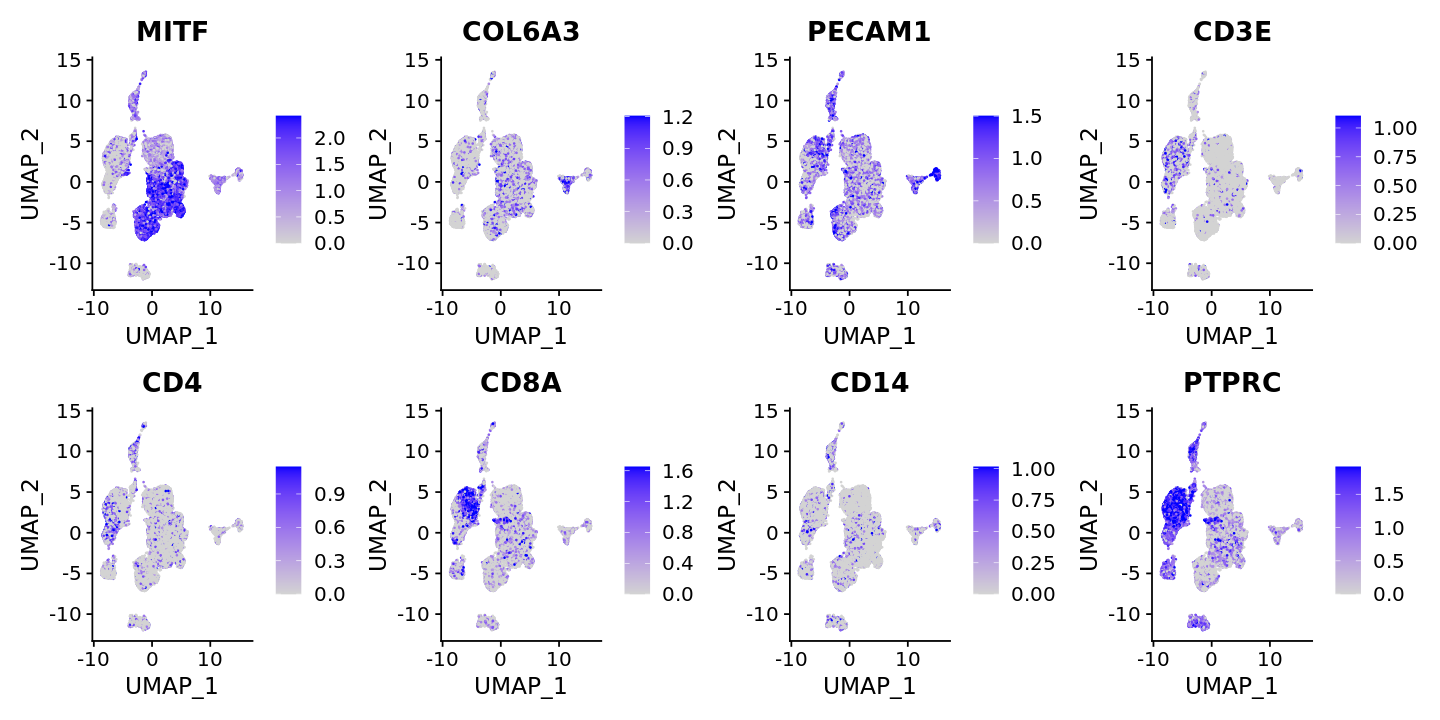

In [54]:
options(repr.plot.height = 6, repr.plot.width = 12)
DefaultAssay(ATAC) <- 'gene.activities'

FeaturePlot(
  object = ATAC,
  features = c('MITF', 'COL6A3', 'PECAM1', 'CD3E', 'CD4', 'CD8A', 'CD14', 'PTPRC'),
  pt.size = 0.1,
  max.cutoff = 'q90',
  ncol = 4
)

# Label transfer

In [7]:
RNA <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_010322.rds")


In [8]:
RNA

An object of class Seurat 
56004 features across 222351 samples within 2 assays 
Active assay: SCT (27709 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [59]:
# Identify anchors
transfer.anchors <- FindTransferAnchors(reference = RNA, query = ATAC,
                                        features = VariableFeatures(object = RNA),
    reference.assay = "RNA", query.assay = "gene.activities", reduction = "cca")

Warning message:
"517 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 2483 features."
Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
"Running CCA on different assays"
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 67602 anchors

Filtering anchors

	Retained 1627 anchors



In [61]:
predicted.celltype <- TransferData(
  anchorset = transfer.anchors,
  refdata = RNA$reannotated.cell.type,
  weight.reduction = ATAC[['lsi']],
  dims = 2:50
)

ATAC <- AddMetaData(object = ATAC, metadata = predicted.celltype)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [63]:
names(ATAC[[]])

[1] "orig.ident"                          
 [2] "nCount_peaks"                        
 [3] "nFeature_peaks"                      
 [4] "total"                               
 [5] "duplicate"                           
 [6] "chimeric"                            
 [7] "unmapped"                            
 [8] "lowmapq"                             
 [9] "mitochondrial"                       
[10] "nonprimary"                          
[11] "passed_filters"                      
[12] "is__cell_barcode"                    
[13] "excluded_reason"                     
[14] "TSS_fragments"                       
[15] "DNase_sensitive_region_fragments"    
[16] "enhancer_region_fragments"           
[17] "promoter_region_fragments"           
[18] "on_target_fragments"                 
[19] "blacklist_region_fragments"          
[20] "peak_region_fragments"               
[21] "peak_region_cutsites"                
[22] "nucleosome_signal"                   
[23] "nucleosome_percentile"               
[24] "TSS.enrichment"                      
[25] "TSS.percentile"                      
[26] "pct_reads_in_peaks"                  
[27] "blacklist_ratio"                     
[28] "nCount_gene.activities"              
[29] "nFeature_gene.activities"            
[30] "predicted.id"                        
[31] "prediction.score.B"                  
[32] "prediction.score.Monocyte.Macrophage"
[33] "prediction.score.Endothelial"        
[34] "prediction.score.cDC"                
[35] "prediction.score.Fibroblastic"       
[36] "prediction.score.NK.NKT"             
[37] "prediction.score.pDC"                
[38] "prediction.score.CD8.T"              
[39] "prediction.score.Tumor"              
[40] "prediction.score.Keratinocyte"       
[41] "prediction.score.CD4.T"              
[42] "prediction.score.Treg"               
[43] "prediction.score.Mast"               
[44] "prediction.score.Cycling.T"          
[45] "prediction.score.Cycling.B"          
[46] "prediction.score.max"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



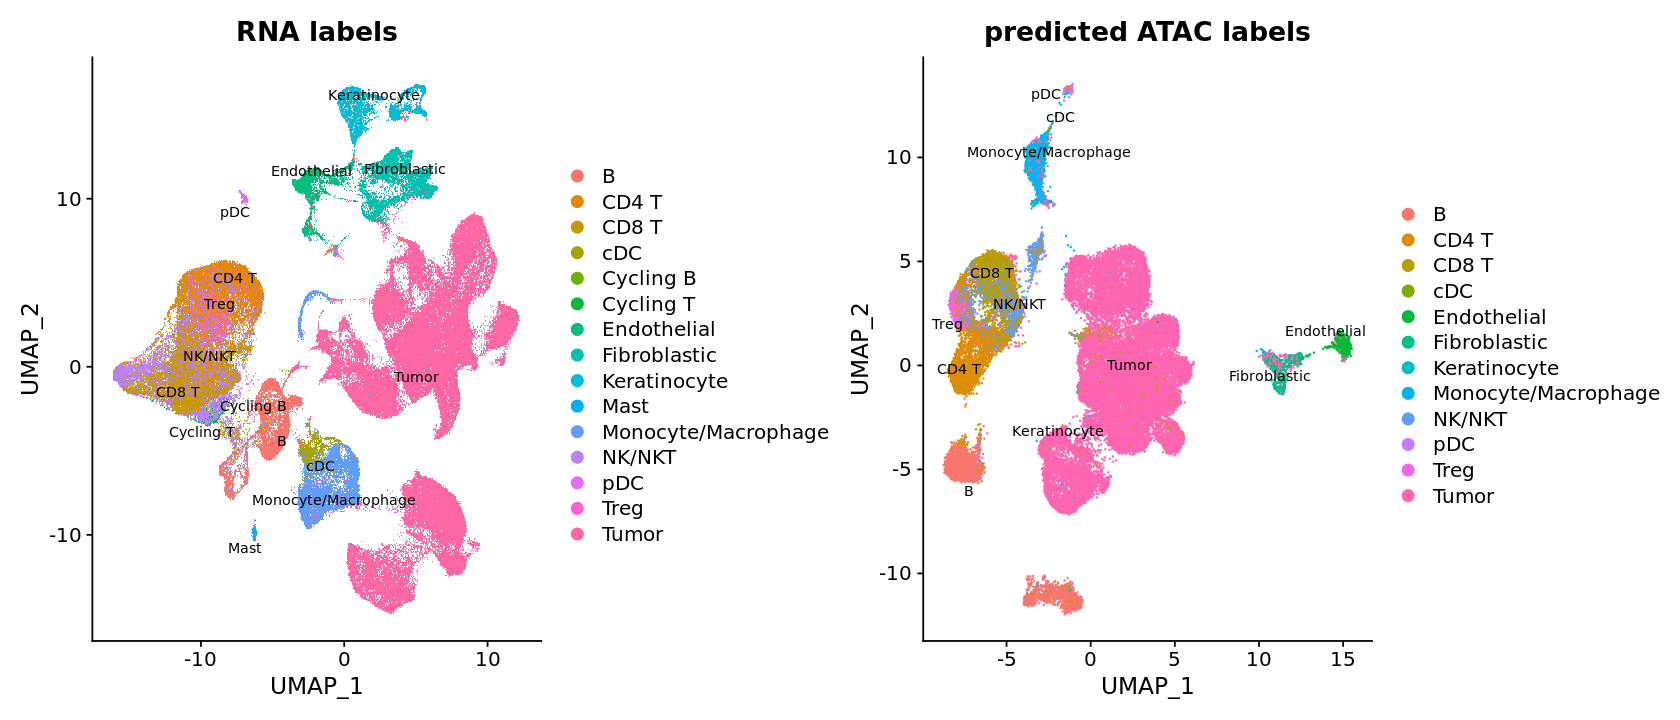

In [64]:
options(repr.plot.height = 6, repr.plot.width = 14)
p1 <- DimPlot(RNA, reduction = "umap", group.by = c("reannotated.cell.type"), label = TRUE, 
              label.size = 3, repel = TRUE)+ ggtitle("RNA labels")
p2 <- DimPlot(ATAC, reduction = "umap", group.by = c("predicted.id"), label = TRUE, 
              label.size = 3, repel = TRUE)+ ggtitle("predicted ATAC labels")
p1+p2

In [65]:
saveRDS(ATAC, file = "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/takedaICI_ATAC_15samples_030721.rds")

# Clustering

In [4]:
ATAC <- readRDS(file = "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/takedaICI_ATAC_15samples_030721.rds")

In [5]:
ATAC

An object of class Seurat 
448275 features across 45478 samples within 2 assays 
Active assay: gene.activities (19607 features, 0 variable features)
 1 other assay present: peaks
 3 dimensional reductions calculated: lsi, harmony, umap

In [78]:
DefaultAssay(ATAC) <- "peaks" 

ATAC <- FindNeighbors(object = ATAC, reduction = 'harmony', dims = 2:30)
ATAC <- FindClusters(object = ATAC, verbose = FALSE, algorithm = 3)

Computing nearest neighbor graph

Computing SNN



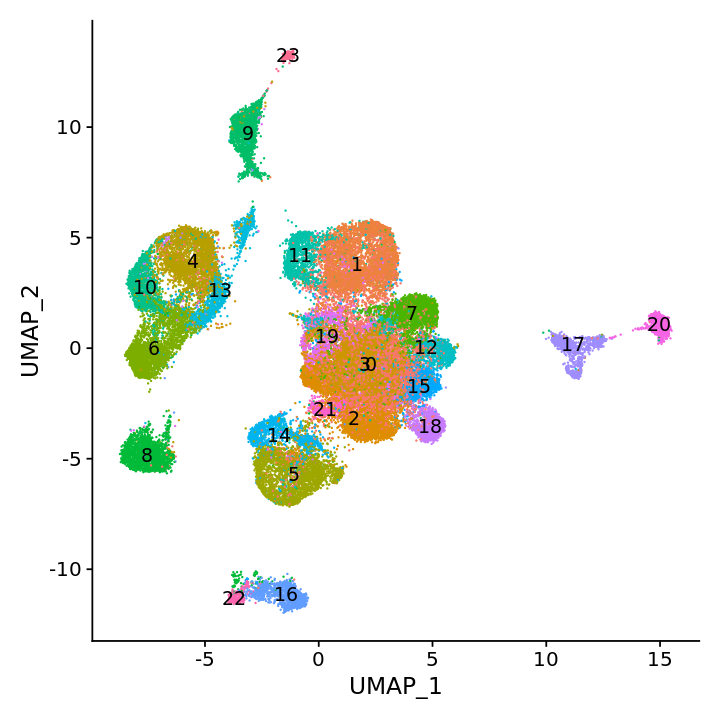

In [80]:
options(repr.plot.height = 6, repr.plot.width = 6)

DimPlot(object = ATAC, label = TRUE) + NoLegend()

In [5]:
library(dbscan)
umap.embed <- as.data.frame(ATAC[["umap"]]@cell.embeddings)
DB.res<-dbscan(umap.embed,eps=0.15,minPts=10)

meta <- ATAC@meta.data
meta$DBscan <- DB.res$cluster
ATAC@meta.data <- meta 

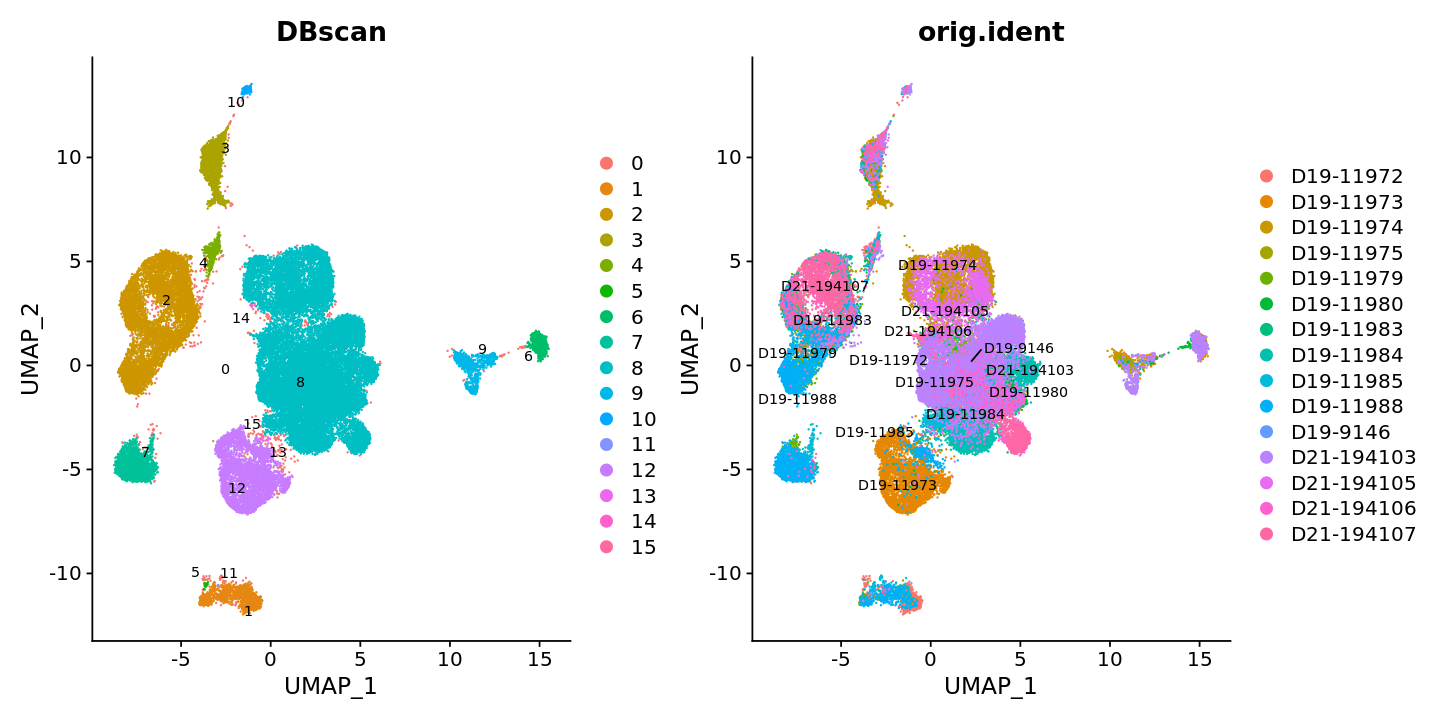

In [93]:
options(repr.plot.height = 6, repr.plot.width = 12)

DimPlot(ATAC, reduction = "umap", group.by = c('DBscan', 'orig.ident'), label = TRUE,
    label.size = 3, repel = TRUE)